In [1]:
#Image detection ste by step
import gluoncv as gcv
import mxnet as mx
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
A:\Anaconda3\envs\GluonCV\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [45]:
image_filepath = 'Desktop/Horse.jpg'

In [46]:
image = mx.image.imread('Desktop/Horse.jpg')

In [47]:
print('shape:', image.shape)
print('data_type:', image.dtype)
print('maximum_value:', image.min().asscalar())
print('minimum_value:', image.max().asscalar())

shape: (720, 1280, 3)
data_type: <class 'numpy.uint8'>
maximum_value: 0
minimum_value: 255


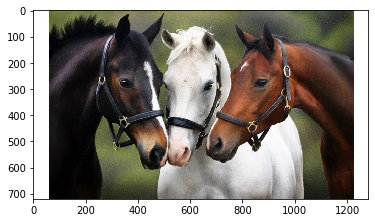

In [48]:
plt.imshow(image.asnumpy())

In [49]:
network = gcv.model_zoo.get_model('yolo3_darknet53_coco' , pretrained=True)

In [50]:
#Below command is only for linux users
#!ls -sh /home/ec2-user/.mxnet/models/yolo3_darkent53_coco*.params

In [51]:
#Reshaping Image
image, chw_image = gcv.data.transforms.presets.yolo.transform_test(image, short=512)
print('shape:', image.shape)
print('data_type:', image.dtype)
print('maximum_value:', image.min().asscalar())
print('minimum_value:', image.max().asscalar())

shape: (1, 3, 512, 910)
data_type: <class 'numpy.float32'>
maximum_value: -2.117904
minimum_value: 2.64


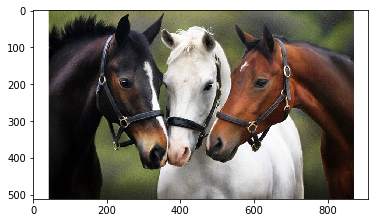

In [52]:
plt.imshow(chw_image)

In [53]:
#making prediction
prediction = network(image)

In [54]:
type(prediction)

tuple

In [55]:
for index, array in enumerate(prediction):
    print('#{}shape: {}'.format(index + 1, array.shape))


#1shape: (1, 100, 1)
#2shape: (1, 100, 1)
#3shape: (1, 100, 4)


In [56]:
#Unpacking prediction
prediction = [array[0] for array in prediction]
class_indicies, probabilities, bounding_boxes=prediction 

In [60]:
#here I'm selecting 17 classes that are too much as comapre to given image(as we can see there are 3 horses so k=3 after this it will show -1)
k=17
print(class_indicies[:k])


[[17.]
 [17.]
 [17.]
 [17.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
<NDArray 17x1 @cpu(0)>


In [58]:
network.classes


['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [59]:
class_index =17
assert class_index > -1
print(network.classes[class_index])

horse


In [61]:
print(probabilities[:k])


[[ 0.9603178 ]
 [ 0.8688164 ]
 [ 0.36650124]
 [ 0.09776942]
 [-1.        ]
 [-1.        ]
 [-1.        ]
 [-1.        ]
 [-1.        ]
 [-1.        ]
 [-1.        ]
 [-1.        ]
 [-1.        ]
 [-1.        ]
 [-1.        ]
 [-1.        ]
 [-1.        ]]
<NDArray 17x1 @cpu(0)>


In [62]:
#3 objects found so 4x4 matrix
print(bounding_boxes[:k])


[[ 42.394043    6.9670105 369.57648   512.66833  ]
 [494.43402    35.84192   877.4672    506.4713   ]
 [336.4311     22.23384   726.9715    511.58728  ]
 [338.95087    41.80081   540.23926   443.2856   ]
 [ -1.         -1.         -1.         -1.       ]
 [ -1.         -1.         -1.         -1.       ]
 [ -1.         -1.         -1.         -1.       ]
 [ -1.         -1.         -1.         -1.       ]
 [ -1.         -1.         -1.         -1.       ]
 [ -1.         -1.         -1.         -1.       ]
 [ -1.         -1.         -1.         -1.       ]
 [ -1.         -1.         -1.         -1.       ]
 [ -1.         -1.         -1.         -1.       ]
 [ -1.         -1.         -1.         -1.       ]
 [ -1.         -1.         -1.         -1.       ]
 [ -1.         -1.         -1.         -1.       ]
 [ -1.         -1.         -1.         -1.       ]]
<NDArray 17x4 @cpu(0)>


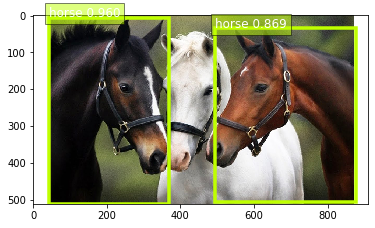

In [67]:
gcv.utils.viz.plot_bbox(chw_image,
                         bounding_boxes,
                         probabilities,
                         class_indicies,
                         class_names=network.classes)